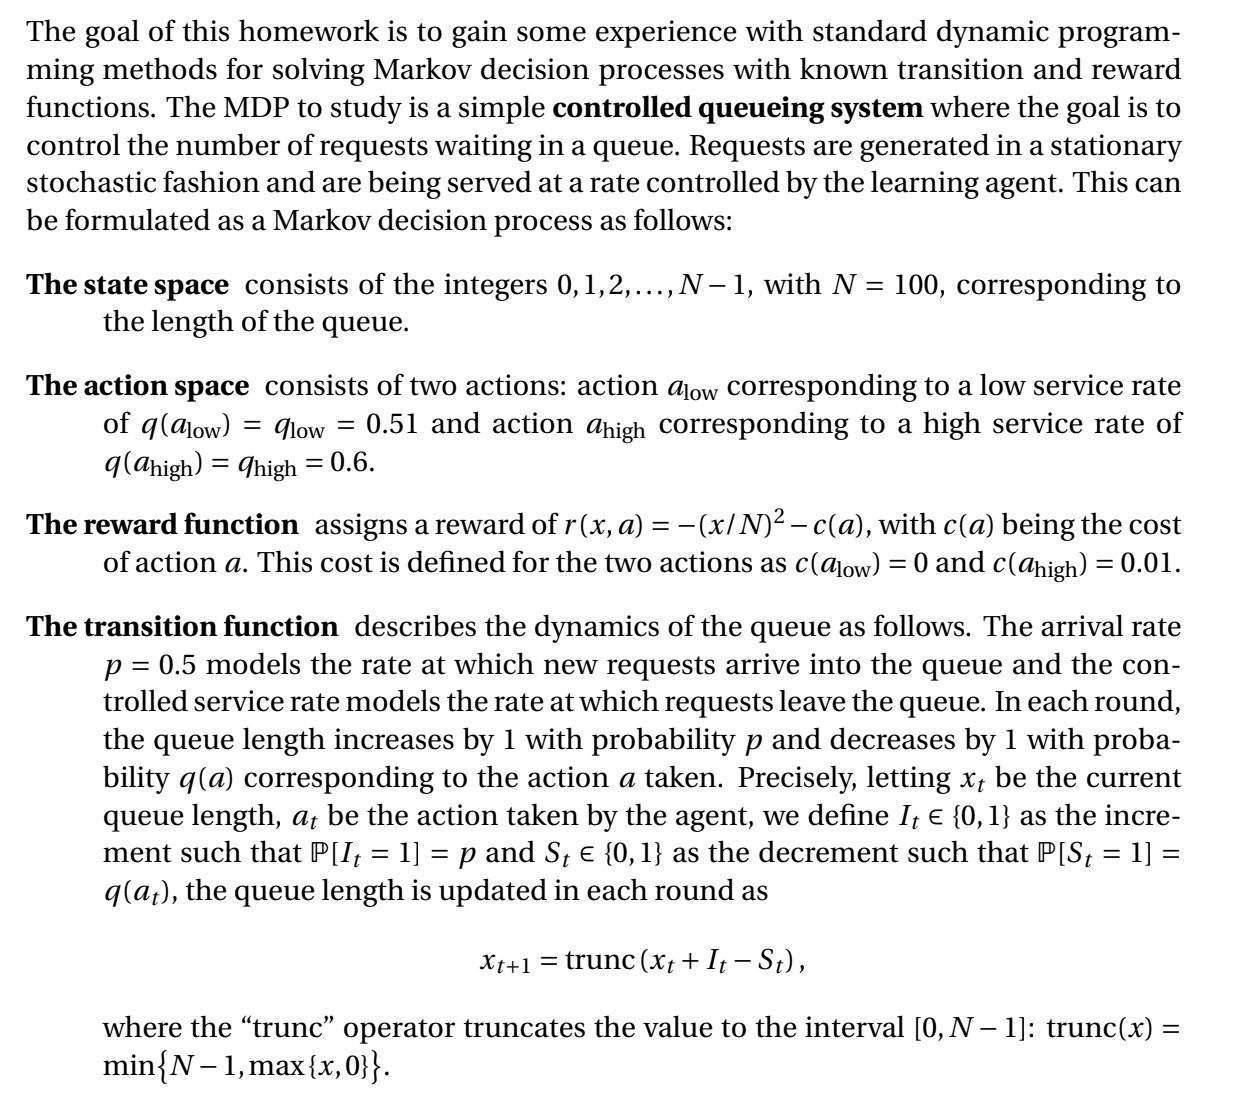

# Basic imports and boundary conditions:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Reward function, given in the prompt:

In [ ]:
def reward(x, N, c):
  return -(x/N)**2 - c

# Problem 1:

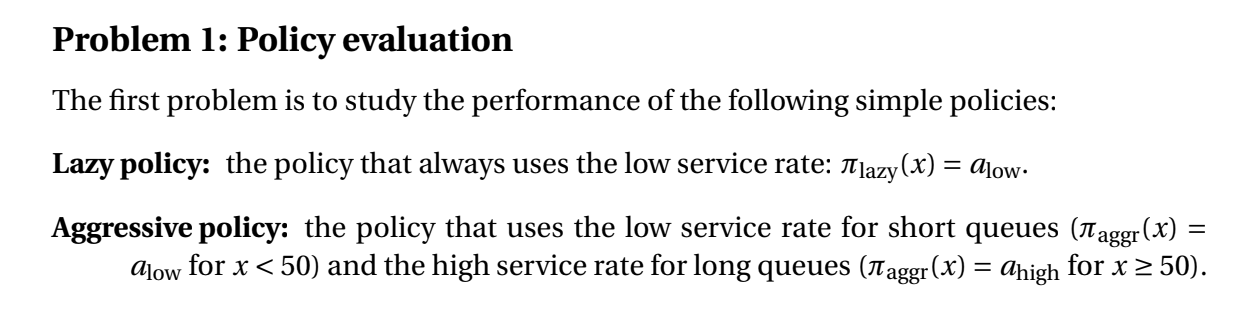

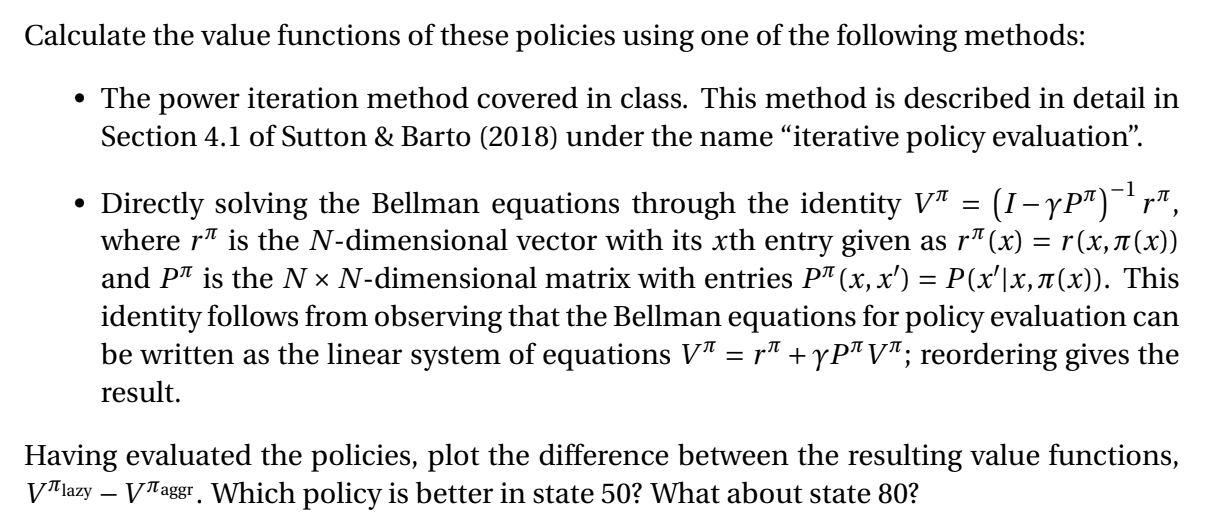

Create two vectors, one with each policy:

In [ ]:
N = 100

# Defining policy vectors:
lazy_policy = ["low"] * N
aggr_policy = ["low"] * int(N/2) + ["high"] * int(N/2)

## Policy Evaluation via Power Iteration Algorithm:

In [ ]:
def compute_value(N, gamma, policy_vector, iterations):
   
  # Initiate Policy Value Vector with zeros:
  policy_value = np.zeros((N))

  for iteration in range(iterations):
    for state in range(N):
      if policy_vector[state] == "high": # this is the action the policy suggests to take at state x
        q = 0.6 # probability of serving one client
        c = 0.01 # impact on the reward function of taking the action
      else: # suggested action would be "low"
        q = 0.51 
        c = 0 

      if state == 0: #only possible change is for the queue to go up by one
        p_increase = 0.5 * (1 - q)
        p_no_change = 0.5 * (1 + q)
        p_decrease = 0
      
        value = reward(state, N, c) + gamma * (p_increase * policy_value[state + 1] + p_no_change * policy_value[state]) # immediate expected reward + discounted reward

      elif state == N-1: #only possible change is for the queue to go down by one
        p_increase = 0
        p_no_change = 1 - 0.5 * q
        p_decrease = 0.5 * q 
        
        value = reward(state, N, c) + gamma * (p_no_change * policy_value[state] + p_decrease * policy_value[state - 1]) # immediate expected reward + discounted reward

      else: 
        p_increase = 0.5 * (1 - q)
        p_no_change = 0.5
        p_decrease = 0.5 * q

        value = reward(state, N, c) + gamma * (p_increase * policy_value[state + 1] + p_no_change * policy_value[state] + p_decrease * policy_value[state - 1]) # immediate reward expected reward + discounted reward

      
      # update the policy value for any of the 3 cases:
      policy_value[state] = value
    
    # alternatively we could update whole vector here (instead of updating single entries of the vector as we compute them). This should be slower.
  
  return policy_value

# tests to see it works:
#compute_value(100, 0.9, lazy_policy, 1000)
#compute_value(100, 0.9, aggr_policy, 1000)

## Via the Bellman equation:

Defining the transition matrix for the two policies:

In [ ]:
def transition_matrix(N, policy):
  matrix = np.zeros((N,N))

  for state in range(N):
    if (policy == "aggressive" and state >= 50):
      q = 0.6
      c = 0.01
    else: 
      q = 0.51 
      c = 0 

    if state == 0: 
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5 * (1 + q)
      p_decrease = 0
    
      matrix[state, state] = p_no_change
      matrix[state, state + 1] = p_increase

    elif state == N-1: 
      p_increase = 0
      p_no_change = 1 - 0.5 * q
      p_decrease = 0.5 * q 
      
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

    else: 
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5
      p_decrease = 0.5 * q

      matrix[state, state + 1] = p_increase
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

  return matrix

# tests to see it works:
#transition_matrix(100, "lazy")
#transition_matrix(100, "aggressive")

Bellman equation closed form solution:

In [ ]:
def bellman_policy_value(N, policy, gamma):
  reward_vector = np.zeros(N)
  if policy == "lazy":
    c = 0
    for state in range(N):
      reward_vector[state] = reward(state, N, c)
  elif policy == "aggressive":
    for state in range(N):
      if state < 50:
        c = 0
      elif state >= 50:
        c = 0.01
      reward_vector[state] = reward(state, N, c)
    
  return np.linalg.inv(np.eye(N) - gamma * transition_matrix(N, policy)).dot(reward_vector) #closed form solution

# tests to see it works:
#bellman_policy_value(100, "lazy", 0.9)
#bellman_policy_value(100, "aggressive", 0.9)

## Results:

The two policies have very similar value:

Text(0.5, 1.0, 'Value of the Lazy and Aggressive Policies \n')

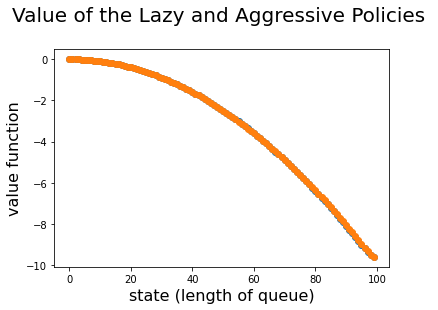

In [ ]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000))
plt.scatter(list(range(100)), y = compute_value(100, 0.9, aggr_policy, 1000))

plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('value function', fontsize = 16)
plt.title("Value of the Lazy and Aggressive Policies \n", fontsize = 20)

But there is a slight difference between their values:

- With power iteration:

Text(0.5, 1.0, 'Difference between the Value of \n the Lazy and Aggressive Policies \n')

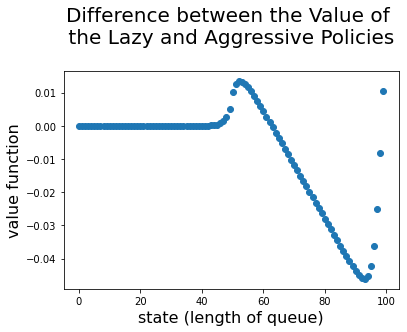

In [ ]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000) - compute_value(100, 0.9, aggr_policy, 1000))
plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('value function', fontsize = 16)
plt.title("Difference between the Value of \n the Lazy and Aggressive Policies \n", fontsize = 20)

- We get the same results with bellman's equation, which offers exact results, therefore the value iteration algorithm converged (or is close enough):

Text(0.5, 1.0, 'Difference between the Value of \n the Lazy and Aggressive Policies \n')

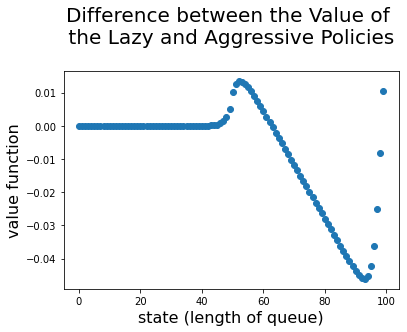

In [ ]:
plt.scatter(list(range(100)), y = bellman_policy_value(100, "lazy", 0.9) - bellman_policy_value(100, "aggressive", 0.9))
plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('value function', fontsize = 16)
plt.title("Difference between the Value of \n the Lazy and Aggressive Policies \n", fontsize = 20)

For state = 50, the lazy policy is better than the aggressive one:

In [ ]:
bellman_policy_value(100, "lazy", 0.9)[50] - bellman_policy_value(100, "aggressive", 0.9)[50]

0.010109901063741322

For state = 80, the aggressive policy is better than the lazy one:

In [ ]:
bellman_policy_value(100, "lazy", 0.9)[80] - bellman_policy_value(100, "aggressive", 0.9)[80]

-0.02799565826829653

# Problem 2:

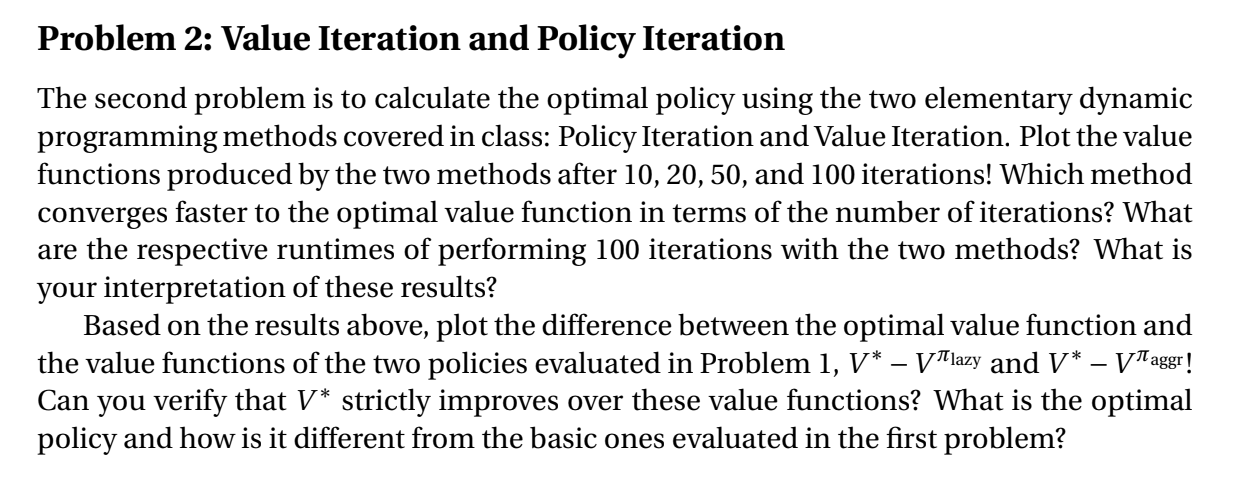

### Policy improvement:


Rewrite everything into matricial form:

In [ ]:
def reward_matrix(N):
  # this generates a matrix that stacks the reward vectors associates with each action
  reward_matrix = np.zeros((N, 2))
  reward_matrix[:,0] = [-(x/N)**2 for x in range(N)]
  reward_matrix[:,1] = [(-(x/N)**2 - 0.01) for x in range(N)]
  
  return reward_matrix

# tests to see it works:
#reward_matrix(100)

In [ ]:
def transition_matrix_2(policy_vector):
  # this generates an X by X matrix with the probabilities of changing from one state into another, from a policy vector of the form ["high", "low", ...]
  N = len(policy_vector)
  matrix = np.zeros((N,N))

  for state in range(N):
    if policy_vector[state] == "high":
      q = 0.6 # probability of successfully serving 1 client
    else: 
      q = 0.51

    if state == 0: #only possible change is for the queue to go up by one
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5 * (1 + q)
      p_decrease = 0
    
      matrix[state, state] = p_no_change
      matrix[state, state + 1] = p_increase

    elif state == N-1: #only possible change is for the queue to go down by one
      p_increase = 0
      p_no_change = 1 - 0.5 * q
      p_decrease = 0.5 * q 
      
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

    else: 
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5
      p_decrease = 0.5 * q

      matrix[state, state + 1] = p_increase
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

  return matrix

# tests to see it works:
#policy_vector = ["low"] * 100
#transition_matrix_2(policy_vector)

We generate a tensor that stacks the two transitions matrices. Note the dimensions of this object are A * X * X

In [ ]:
policy_vector = ["low"] * 100
a = transition_matrix_2(policy_vector)
policy_vector = ["high"] * 100
b = transition_matrix_2(policy_vector)
P = np.stack((a,b))

Value Iteration Algorithm:

In [ ]:
def value_iteration(N, iterations, gamma, P):
  V = np.zeros(N)
  reward_mat = reward_matrix(N)

  for iteration in range(iterations):
    V_next = - np.inf * np.ones(N)
    Q_estimate = np.zeros((N, 2))

    for state in range(N):
      for action in range(2):
        Q_estimate[state, action] = reward_mat[state, action] + gamma * P[action, state, :].dot(V)
        if Q_estimate[state, action] > V_next[state]:
          V_next[state] = Q_estimate[state, action]
    
    V = V_next
  
  return V

# tests to see it works:
#value_iteration(100, 100, 0.9, P)

Policy iteration algorithm:

In [ ]:
def policy_iteration(N, iterations_for_policy_iteration, gamma, P, iterations_for_power_iteration):
  V = np.zeros(N)
  reward_mat = reward_matrix(N)

  for iteration in range(iterations_for_policy_iteration):
    V_next = - np.inf * np.ones(N)
    Q_estimate = np.zeros((N, 2))
    pi_greedy = np.zeros((N, 2))

    for state in range(N):
      for action in range(2):
        Q_estimate[state, action] = reward_mat[state, action] + gamma * P[action, state, :].dot(V)
        if Q_estimate[state, action] > V_next[state]:
          V_next[state] = Q_estimate[state, action]
          pi_greedy[state, :] = np.zeros(2)
          pi_greedy[state, action] = 1

    policy_vector = []
    for state in range(len(pi_greedy[:,0])):
      if pi_greedy[state, 0] == 1:
        policy_vector.append("low")
      else: policy_vector.append("high")

    V = compute_value(N, gamma, policy_vector, iterations_for_power_iteration)
  
  return V, policy_vector

# tests to see it works:
#policy_iteration(100, 100, 0.9, P, 100)


## Results:
- Plotting the value functions for different number of iterations:

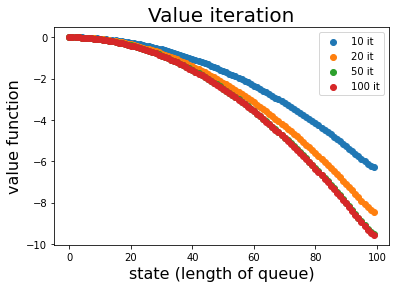

In [ ]:
for iterations in [10, 20, 50, 100]:
  plt.scatter(list(range(100)), y = value_iteration(100, iterations, 0.9, P), label = "{} it".format(iterations))

plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('value function', fontsize = 16)
plt.title("Value iteration", fontsize = 20)
plt.legend()

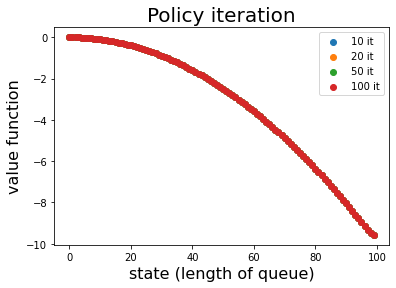

In [ ]:
for iterations in [10, 20, 50, 100]:
  y, _ = policy_iteration(100, iterations, 0.9, P, 100)
  plt.scatter(list(range(100)), y = y, label = "{} it".format(iterations))
  

plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('value function', fontsize = 16)
plt.title("Policy iteration", fontsize = 20)
plt.legend()

We can see that the Policy Iteration algorithm converges much faster (in terms of iterations needed) than Value Iteration, and that it needs 10 or less iterations to do so.

- Runtimes for 100 iterations:

In [ ]:
import time
vi_times = []
pi_times = []

for experiment in range(20): # we run the algorithms for 100 iterations, 20 times each
  start_time = time.time()
  value_iteration(100, 100, 0.9, P)
  vi_times.append(time.time() - start_time)

  start_time = time.time()
  policy_iteration(100, 100, 0.9, P, 100)
  pi_times.append(time.time() - start_time)

In [ ]:
from numpy.ma.extras import average
print("Average runtime for Value Iteration: " + str(average(vi_times)) + " secs")
print("Average runtime for Policy Iteration: " + str(average(pi_times)) + " secs")

Average runtime for Value Iteration: 0.059564054012298584 secs
Average runtime for Policy Iteration: 1.8055185556411744 secs


We see that the Policy Iteration algorithm requires about 30 times as much time to run as Value Iteration. Aside from the fact that Policy Iteration should be slower due to performing a Policy Evaluating step -where it computes the Value of the Policy at each iteration- our code also employs Power Iteration with 100 iterations (as opposed to Bellman Policy Evaluation) so naturally it is expected to be more computationally expensive.

On the other hand, as indicated on the previous question, the Policy Iteration algorithm does not need as many iterations as the Value Iteration one in order to converge to the optimal policy, at least for this MDP. So there is a tradeoff between runtimes per iteration and the number of iterations needed.

- Difference between the optimal value function and the value functions of the "lazy" and "aggressive" policies:

Text(0.5, 1.0, 'Optimal vs Lazy')

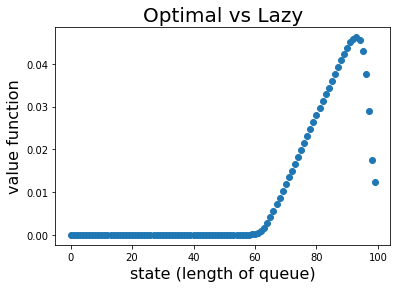

In [ ]:
_, optimal_policy = policy_iteration(100, 100, 0.9, P, 100)

plt.scatter(list(range(100)), y = compute_value(100, 0.9, optimal_policy, 1000) - compute_value(100, 0.9, lazy_policy, 1000))

plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('value function', fontsize = 16)
plt.title("Optimal vs Lazy", fontsize = 20)

Text(0.5, 1.0, 'Optimal vs Aggressive')

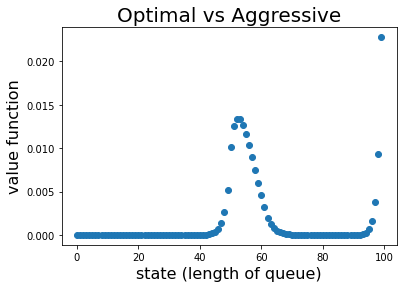

In [ ]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, optimal_policy, 1000) - compute_value(100, 0.9, aggr_policy, 1000))

plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('value function', fontsize = 16)
plt.title("Optimal vs Aggressive", fontsize = 20)

We see that in both cases the value of the optimal policy is, for all the states, better (or as good as) the value of the other two policies, so it strictly improves on them.

- Comparison between policies:

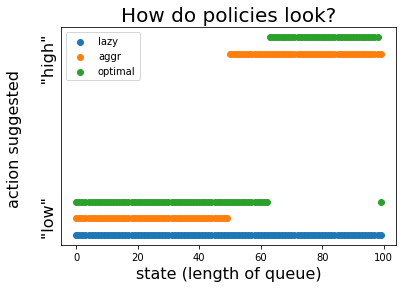

In [ ]:
def plotable(policy, num):
  return [1 + num if action == "high" else num for action in policy]

for policy, num, label in [(lazy_policy, 0, "lazy"), (aggr_policy, 0.1, "aggr"), (optimal_policy, 0.2, "optimal")]:
  plt.scatter(list(range(len(policy))), y = plotable(policy, num), label = label)

plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('action suggested \n \n"low"                      "high"', fontsize = 16)
plt.title("How do policies look?", fontsize = 20)
plt.yticks([])
plt.legend()

In [ ]:
print(optimal_policy[62])
print(optimal_policy[63])
print(optimal_policy[99])

low
high
low


We see that the optimal policy suggests employing:
- Low level of service action for states 0 to 62, and 99 (64% of the cases)
- High level of service action for states 63 to 98 (36%)